In [1]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import *
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.metrics import confusion_matrix

In [2]:
# hyperparams
C = 45
N_SPLITS = 10
n_dim = 30

In [3]:
X = np.load('peak.npy')
print('data shape:', X.shape)
#scale data
scaled_data = StandardScaler().fit_transform(X)
print(scaled_data.mean())

# perform pca
pca = PCA(n_components=n_dim)
X = pca.fit_transform(scaled_data)
print(X.shape)
X = StandardScaler().fit_transform(X)
y = np.load('targets.npy')
print(y.shape)

data shape: (326, 2278)
7.286950499508398e-17
(326, 30)
(326,)


In [4]:
def evaluate(X, y):    
    shuffler = StratifiedShuffleSplit(test_size=0.2)
    acc = np.empty(10)
    M = []
    for i, (train_index, test_index) in enumerate(shuffler.split(X, y)):
            X_train, y_train = X[train_index], y[train_index]
            X_test, y_test = X[test_index], y[test_index]
            model.fit(X_train, y_train)
            acc[i] = model.score(X_test, y_test)
            M.append(model)
    i = acc.argmax()
    print('Optimal accuracy is', acc[i])
    y_pred = M[i].predict(X)
    return confusion_matrix(y, y_pred)

In [5]:
# model = SGDClassifier(max_iter=10e6, tol=1e-2)
# evaluate(model, X, y)

In [6]:
model = LogisticRegression(C=11, max_iter=10e6, solver='liblinear', multi_class='ovr')
cm = evaluate(X, y)
print(cm)

Optimal accuracy is 0.9545454545454546
[[44  0  0  0  0  1  0]
 [ 0 16  0  0  0  1  1]
 [ 1  0 58  0  0  0  0]
 [ 0  0  0 24  0  1  0]
 [ 0  0  1  0 68  0  0]
 [ 0  0  0  0  0 27  0]
 [ 0  0  0  0  0  0 83]]


In [7]:
from emotion import *
import utils
from PIL import Image
import dlib
import matplotlib.pyplot as plt

In [8]:
X = np.load('peak.npy')
y = np.load('targets.npy')
classes = ['neutral', 'anger', 'contempt', 'disgust', 'fear', 'happy', 'sadness', 'surprise']
model = EmotionDetector(X,y, classes)
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("../models/shape_predictor_68_face_landmarks.dat")

Optimal accuracy is 0.9591836734693877


Text(0.5, 0, 'happy')

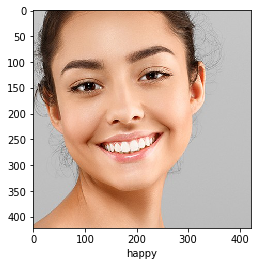

In [9]:
image = np.array(Image.open('face2.jpg'))
ret, f, z = utils.getLandmarks(image, detector, predictor)
clsname = model.predictClass(f)
plt.imshow(image)
plt.xlabel(clsname)

Text(0.5, 0, 'sadness')

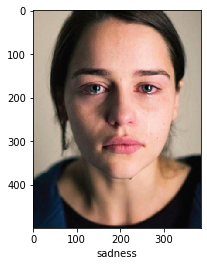

In [10]:
image = np.array(Image.open('sad.jpg'))
ret, f, z = utils.getLandmarks(image, detector, predictor)
clsname = model.predictClass(f)
plt.imshow(image)
plt.xlabel(clsname)

Text(0.5, 0, 'surprise')

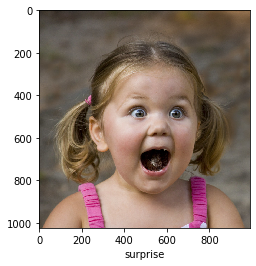

In [11]:
image = np.array(Image.open('surprise.jpg'))
ret, f, z = utils.getLandmarks(image, detector, predictor)
clsname = model.predictClass(f)
plt.imshow(image)
plt.xlabel(clsname)